In [1]:
import pandas as pd

com = pd.read_csv("community/FB_groups_States_climate_change.csv", sep= ",")
pol = pd.read_csv("political/Topics_FB_Political_Posts_per_partyclimate_change.csv", sep = ",")
news = pd.read_csv("news/FB_groups_News_Media_Outlets_climate_change.csv", sep=",")

In [2]:
com.head()

,Unnamed: 0,name,Page or Account URL,List,State,state,Facebook Id,Group Name,User Name,Likes at Posting,...,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Total Interactions,Overperforming Score,MessageDescr,MessageOnly


In [3]:
pol.head()

,Unnamed: 0,Group Name,User Name,Facebook Id,Likes at Posting,Created,Type,Likes,Comments,Shares,...,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Total Interactions,Overperforming Score,MessageDescr,MessageOnly,party


In [4]:
news.head()

,Unnamed: 0,Page Name,User Name,Facebook Id,Likes at Posting,Created,Type,Likes,Comments,Shares,...,Sponsor Id,Sponsor Name,Total Interactions,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),Overperforming Score,clean_url,State,Facebook,MessageDescr,MessageOnly
0,107123,Democracy Now! en español,democracynowes,58670196103,29067.0,2020-09-09 17:30:11 EDT,Link,24,0,16,...,NaN,NaN,42,42,1.11,democracynowes,New York,https://www.facebook.com/democracynowes,El incendio de Dolan es solo uno de los al men...,El incendio de Dolan es solo uno de los al men...
1,287137,Democracy Now! en español,democracynowes,58670196103,29043.0,2020-10-15 19:00:25 EDT,Link,4,4,8,...,NaN,NaN,30,30,-1.43,democracynowes,New York,https://www.facebook.com/democracynowes,La candidata a jueza de la Corte Suprema Amy C...,La candidata a jueza de la Corte Suprema Amy C...


In [5]:
pol.rename(columns = {'Group Name': 'name'}, inplace=True)
news.rename(columns = {'Page Name': 'name'}, inplace=True)

In [6]:
print(pol.name.nunique())
print(pol.name.unique())

0
[]


In [7]:
print(type(com))
print(type(com['name']))
print(type(com.name))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
com.name.fillna(com['Group Name'], inplace = True)
print(len(com))
com.tail()

0


,Unnamed: 0,name,Page or Account URL,List,State,state,Facebook Id,Group Name,User Name,Likes at Posting,...,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Total Interactions,Overperforming Score,MessageDescr,MessageOnly


In [9]:
print(type(com))
print(type(com.name))
temp = com.name.tolist()
print(type(temp))
#print(type(temp[0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'list'>


In [10]:
cond = []
for x in temp:
    if 'Trump' in x:
        cond.append(x)
    if 'Democr' in x:
        cond.append(x)
    if 'Repub' in x:
        cond.append(x)
    if 'repub' in x:
        cond.append(x)

In [11]:
print(len(cond))
#v is index
v = []
for x in range(len(com['name'])):
    if com['name'][x] in cond:
        v.append(x)
print 

print(len(v))
for i in v:
    pol = pol.append(com.iloc[i])

com.drop(
    labels = v,
    axis =0,
    inplace=True
)

pol.tail()
print(com.name.unique())

0
0
[]


In [12]:
print(len(com))
print(com.name.unique())
temp = []
temp = com.name.unique()
print(len(temp))

0
[]
0


In [13]:
#column 1 = group, column 2 = 'name' column 3 = 'frequency'

group = []
name = []
frequency = []
#community
for x in range(len(com)):
    
    # new row
    if com['name'].iloc[x] not in name:
        #append new name
        name.append(com['name'].iloc[x])
        #create new row
        group.append('Community')
        #give value of 1
        frequency.append(1)
    else:
        v = name.index(com['name'].iloc[x])
        frequency[v] +=1

#political
for x in range(len(pol)):
    if pol['name'].iloc[x] not in name:
        #append new name
        name.append(pol['name'].iloc[x])
        #create new row
        group.append('Political')
        #give value of 1
        frequency.append(1)
    else:
        v = name.index(pol['name'].iloc[x])
        frequency[v] +=1
        
#news
for x in range(len(news)):
    if news['name'].iloc[x] not in name:
        #append new name
        name.append(news['name'].iloc[x])
        #create new row
        group.append('News')
        #give value of 1
        frequency.append(1)
    else:
        v = name.index(news['name'].iloc[x])
        frequency[v] +=1

dict = {'name': name, 'group': group, 'frequency': frequency}
df = pd.DataFrame(dict)
df


,name,group,frequency
0,Democracy Now! en español,News,2


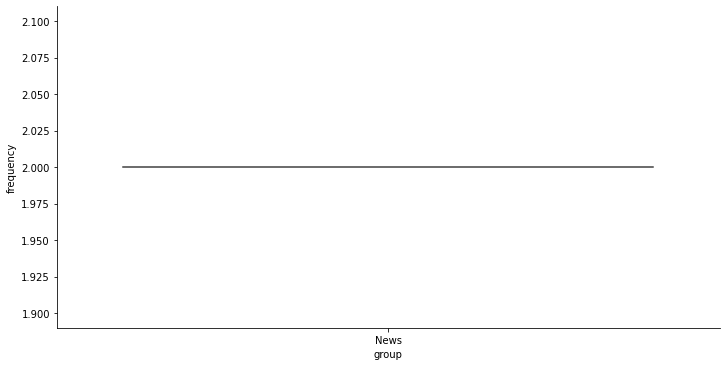

In [14]:
import seaborn as sns

sns.catplot(x='group', y = 'frequency', data =df, dodge=True, kind = 'violin', aspect =2)

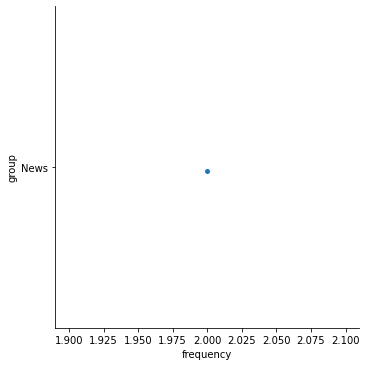

In [15]:
sns.catplot(x='frequency', y ='group', data=df, kind ='strip')

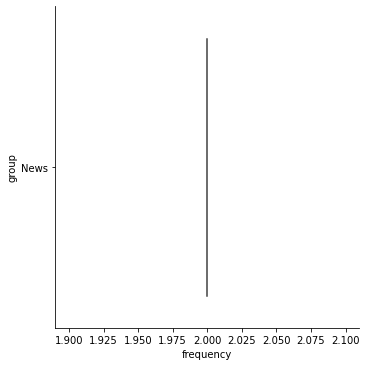

In [16]:
sns.catplot(x='frequency', y ='group', data=df, kind ='violin')